In [2]:
import os
import tensorflow as tf
import numpy as np
from mlp.data_providers import CIFAR10DataProvider, CIFAR100DataProvider
import matplotlib.pyplot as plt
%matplotlib inline

train_data = CIFAR10DataProvider('train', batch_size=50)
valid_data = CIFAR10DataProvider('valid', batch_size=50)



def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

In [15]:


inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)

with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
    
init = tf.global_variables_initializer()

listacc_train_1=[]
listerr_train_1=[]
listacc_valid_1=[]
listerr_valid_1=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(40):
        running_error = 0.
        running_accuracy = 0.
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        listerr_train_1.append(running_error)
        listacc_train_1.append(running_accuracy)
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        listerr_valid_1.append(valid_error)
        listacc_valid_1.append(valid_accuracy)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=2.03 acc(train)=0.31
                 err(valid)=1.73 acc(valid)=0.37
End of epoch 02: err(train)=1.72 acc(train)=0.38
                 err(valid)=1.68 acc(valid)=0.40
End of epoch 03: err(train)=1.62 acc(train)=0.42
                 err(valid)=1.58 acc(valid)=0.43
End of epoch 04: err(train)=1.57 acc(train)=0.44
                 err(valid)=1.56 acc(valid)=0.43
End of epoch 05: err(train)=1.52 acc(train)=0.45
                 err(valid)=1.59 acc(valid)=0.44
End of epoch 06: err(train)=1.49 acc(train)=0.46
                 err(valid)=1.52 acc(valid)=0.46
End of epoch 07: err(train)=1.46 acc(train)=0.48
                 err(valid)=1.51 acc(valid)=0.46
End of epoch 08: err(train)=1.42 acc(train)=0.49
                 err(valid)=1.47 acc(valid)=0.48
End of epoch 09: err(train)=1.40 acc(train)=0.50
                 err(valid)=1.46 acc(valid)=0.48
End of epoch 10: err(train)=1.37 acc(train)=0.51
                 err(valid)=1.48 acc(valid)=0.48
End of epoch 11: err

In [16]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs
def fully_connected_layer_norm(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    return weights

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    weights1=fully_connected_layer_norm(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    weights2=fully_connected_layer_norm(hidden_1, num_hidden, num_hidden)

with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    weights3=fully_connected_layer_norm(hidden_1, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    l2_loss = tf.nn.l2_loss(weights1)+tf.nn.l2_loss(weights2)+tf.nn.l2_loss(weights3)
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))+0.001 * l2_loss
    
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
    
init = tf.global_variables_initializer()

listacc_train_2=[]
listerr_train_2=[]
listacc_valid_2=[]
listerr_valid_2=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(40):
        running_error = 0.
        running_accuracy = 0.
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        listerr_train_2.append(running_error)
        listacc_train_2.append(running_accuracy)
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        listerr_valid_2.append(valid_error)
        listacc_valid_2.append(valid_accuracy)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=2.07 acc(train)=0.31
                 err(valid)=1.79 acc(valid)=0.35
End of epoch 02: err(train)=1.72 acc(train)=0.38
                 err(valid)=1.70 acc(valid)=0.38
End of epoch 03: err(train)=1.63 acc(train)=0.41
                 err(valid)=1.59 acc(valid)=0.44
End of epoch 04: err(train)=1.58 acc(train)=0.43
                 err(valid)=1.56 acc(valid)=0.44
End of epoch 05: err(train)=1.54 acc(train)=0.45
                 err(valid)=1.61 acc(valid)=0.43
End of epoch 06: err(train)=1.49 acc(train)=0.46
                 err(valid)=1.56 acc(valid)=0.44
End of epoch 07: err(train)=1.48 acc(train)=0.47
                 err(valid)=1.57 acc(valid)=0.45
End of epoch 08: err(train)=1.44 acc(train)=0.48
                 err(valid)=1.49 acc(valid)=0.47
End of epoch 09: err(train)=1.41 acc(train)=0.49
                 err(valid)=1.49 acc(valid)=0.48
End of epoch 10: err(train)=1.37 acc(train)=0.51
                 err(valid)=1.51 acc(valid)=0.47
End of epoch 11: err

In [7]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs
def fully_connected_layer_norm(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    return weights

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    weights1=fully_connected_layer_norm(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    weights2=fully_connected_layer_norm(hidden_1, num_hidden, num_hidden)

with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    weights3=fully_connected_layer_norm(hidden_1, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    l2_loss = tf.nn.l2_loss(weights1)+tf.nn.l2_loss(weights2)+tf.nn.l2_loss(weights3)
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))+0.001 * l2_loss
    
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(0.001).minimize(error)
    
init = tf.global_variables_initializer()

listacc_train_3=[]
listerr_train_3=[]
listacc_valid_3=[]
listerr_valid_3=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(40):
        running_error = 0.
        running_accuracy = 0.
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        listerr_train_3.append(running_error)
        listacc_train_3.append(running_accuracy)
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        listerr_valid_3.append(valid_error)
        listacc_valid_3.append(valid_accuracy)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=2.08 acc(train)=0.31
                 err(valid)=1.73 acc(valid)=0.38
End of epoch 02: err(train)=1.72 acc(train)=0.38
                 err(valid)=1.79 acc(valid)=0.36
End of epoch 03: err(train)=1.63 acc(train)=0.42
                 err(valid)=1.65 acc(valid)=0.41
End of epoch 04: err(train)=1.58 acc(train)=0.43
                 err(valid)=1.52 acc(valid)=0.46
End of epoch 05: err(train)=1.53 acc(train)=0.45
                 err(valid)=1.55 acc(valid)=0.46
End of epoch 06: err(train)=1.49 acc(train)=0.46
                 err(valid)=1.54 acc(valid)=0.45
End of epoch 07: err(train)=1.47 acc(train)=0.47
                 err(valid)=1.59 acc(valid)=0.42
End of epoch 08: err(train)=1.44 acc(train)=0.49
                 err(valid)=1.52 acc(valid)=0.46
End of epoch 09: err(train)=1.41 acc(train)=0.50
                 err(valid)=1.46 acc(valid)=0.49
End of epoch 10: err(train)=1.37 acc(train)=0.51
                 err(valid)=1.47 acc(valid)=0.49
End of epoch 11: err

In [9]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs
def fully_connected_layer_norm(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    return weights

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    weights1=fully_connected_layer_norm(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    weights2=fully_connected_layer_norm(hidden_1, num_hidden, num_hidden)

with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    weights3=fully_connected_layer_norm(hidden_1, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    l2_loss = tf.nn.l2_loss(weights1)+tf.nn.l2_loss(weights2)+tf.nn.l2_loss(weights3)
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))+0.001 * l2_loss
    
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(0.001).minimize(error)
    
init = tf.global_variables_initializer()

listacc_train_4=[]
listerr_train_4=[]
listacc_valid_4=[]
listerr_valid_4=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(40):
        running_error = 0.
        running_accuracy = 0.
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        listerr_train_4.append(running_error)
        listacc_train_4.append(running_accuracy)
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        listerr_valid_4.append(valid_error)
        listacc_valid_3.append(valid_accuracy)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=1.78 acc(train)=0.20
                 err(valid)=1.81 acc(valid)=0.33
End of epoch 02: err(train)=1.76 acc(train)=0.37
                 err(valid)=1.65 acc(valid)=0.41
End of epoch 03: err(train)=1.66 acc(train)=0.40
                 err(valid)=1.60 acc(valid)=0.42
End of epoch 04: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.59 acc(valid)=0.43
End of epoch 05: err(train)=1.54 acc(train)=0.45
                 err(valid)=1.57 acc(valid)=0.44
End of epoch 06: err(train)=1.50 acc(train)=0.46
                 err(valid)=1.57 acc(valid)=0.45
End of epoch 07: err(train)=1.46 acc(train)=0.47
                 err(valid)=1.61 acc(valid)=0.42
End of epoch 08: err(train)=1.44 acc(train)=0.48
                 err(valid)=1.52 acc(valid)=0.46
End of epoch 09: err(train)=1.40 acc(train)=0.49
                 err(valid)=1.52 acc(valid)=0.47
End of epoch 10: err(train)=1.38 acc(train)=0.50
                 err(valid)=1.52 acc(valid)=0.47
End of epoch 11: err

In [10]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs
def fully_connected_layer_norm(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    return weights

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    weights1=fully_connected_layer_norm(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    weights2=fully_connected_layer_norm(hidden_1, num_hidden, num_hidden)

with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    weights3=fully_connected_layer_norm(hidden_1, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    l2_loss = tf.nn.l2_loss(weights1)+tf.nn.l2_loss(weights2)+tf.nn.l2_loss(weights3)
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))+0.001 * l2_loss
    
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(0.0001).minimize(error)
    
init = tf.global_variables_initializer()

listacc_train_5=[]
listerr_train_5=[]
listacc_valid_5=[]
listerr_valid_5=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(40):
        running_error = 0.
        running_accuracy = 0.
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        listerr_train_5.append(running_error)
        listacc_train_5.append(running_accuracy)
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        listerr_valid_5.append(valid_error)
        listacc_valid_5.append(valid_accuracy)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=2.17 acc(train)=0.34
                 err(valid)=1.83 acc(valid)=0.38
End of epoch 02: err(train)=1.70 acc(train)=0.40
                 err(valid)=1.62 acc(valid)=0.44
End of epoch 03: err(train)=1.60 acc(train)=0.44
                 err(valid)=1.59 acc(valid)=0.44
End of epoch 04: err(train)=1.54 acc(train)=0.45
                 err(valid)=1.59 acc(valid)=0.43
End of epoch 05: err(train)=1.50 acc(train)=0.47
                 err(valid)=1.58 acc(valid)=0.44
End of epoch 06: err(train)=1.46 acc(train)=0.49
                 err(valid)=1.52 acc(valid)=0.47
End of epoch 07: err(train)=1.42 acc(train)=0.50
                 err(valid)=1.49 acc(valid)=0.48
End of epoch 08: err(train)=1.38 acc(train)=0.51
                 err(valid)=1.50 acc(valid)=0.47
End of epoch 09: err(train)=1.36 acc(train)=0.52
                 err(valid)=1.43 acc(valid)=0.50
End of epoch 10: err(train)=1.32 acc(train)=0.54
                 err(valid)=1.48 acc(valid)=0.48
End of epoch 11: err

In [ ]:
learning rate

In [21]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs
def fully_connected_layer_norm(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    return weights

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)

with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(0.01).minimize(error)
    
init = tf.global_variables_initializer()

listacc_train_6=[]
listerr_train_6=[]
listacc_valid_6=[]
listerr_valid_6=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(40):
        running_error = 0.
        running_accuracy = 0.
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        listerr_train_6.append(running_error)
        listacc_train_6.append(running_accuracy)
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        listerr_valid_6.append(valid_error)
        listacc_valid_6.append(valid_accuracy)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=4.77 acc(train)=0.17
                 err(valid)=2.08 acc(valid)=0.19
End of epoch 02: err(train)=2.18 acc(train)=0.21
                 err(valid)=2.22 acc(valid)=0.21
End of epoch 03: err(train)=2.20 acc(train)=0.21
                 err(valid)=2.24 acc(valid)=0.25
End of epoch 04: err(train)=2.21 acc(train)=0.22
                 err(valid)=2.17 acc(valid)=0.21
End of epoch 05: err(train)=2.24 acc(train)=0.21
                 err(valid)=2.04 acc(valid)=0.24
End of epoch 06: err(train)=2.28 acc(train)=0.21
                 err(valid)=2.48 acc(valid)=0.21
End of epoch 07: err(train)=2.28 acc(train)=0.21
                 err(valid)=2.18 acc(valid)=0.20
End of epoch 08: err(train)=2.26 acc(train)=0.22
                 err(valid)=2.23 acc(valid)=0.19
End of epoch 09: err(train)=2.28 acc(train)=0.22
                 err(valid)=2.06 acc(valid)=0.23
End of epoch 10: err(train)=2.30 acc(train)=0.21
                 err(valid)=2.29 acc(valid)=0.19
End of epoch 11: err

In [22]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs
def fully_connected_layer_norm(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    return weights

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)

with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(0.0001).minimize(error)
    
init = tf.global_variables_initializer()

listacc_train_7=[]
listerr_train_7=[]
listacc_valid_7=[]
listerr_valid_7=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(40):
        running_error = 0.
        running_accuracy = 0.
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        listerr_train_7.append(running_error)
        listacc_train_7.append(running_accuracy)
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        listerr_valid_7.append(valid_error)
        listacc_valid_7.append(valid_accuracy)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=1.86 acc(train)=0.34
                 err(valid)=1.74 acc(valid)=0.39
End of epoch 02: err(train)=1.67 acc(train)=0.41
                 err(valid)=1.68 acc(valid)=0.41
End of epoch 03: err(train)=1.60 acc(train)=0.44
                 err(valid)=1.60 acc(valid)=0.44
End of epoch 04: err(train)=1.54 acc(train)=0.46
                 err(valid)=1.56 acc(valid)=0.45
End of epoch 05: err(train)=1.49 acc(train)=0.48
                 err(valid)=1.55 acc(valid)=0.46
End of epoch 06: err(train)=1.45 acc(train)=0.49
                 err(valid)=1.50 acc(valid)=0.48
End of epoch 07: err(train)=1.41 acc(train)=0.50
                 err(valid)=1.49 acc(valid)=0.48
End of epoch 08: err(train)=1.38 acc(train)=0.52
                 err(valid)=1.47 acc(valid)=0.48
End of epoch 09: err(train)=1.35 acc(train)=0.53
                 err(valid)=1.43 acc(valid)=0.50
End of epoch 10: err(train)=1.32 acc(train)=0.54
                 err(valid)=1.46 acc(valid)=0.49
End of epoch 11: err

In [23]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs
def fully_connected_layer_norm(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    return weights

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)

with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(0.000001).minimize(error)
    
init = tf.global_variables_initializer()

listacc_train_8=[]
listerr_train_8=[]
listacc_valid_8=[]
listerr_valid_8=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(40):
        running_error = 0.
        running_accuracy = 0.
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        listerr_train_8.append(running_error)
        listacc_train_8.append(running_accuracy)
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        listerr_valid_8.append(valid_error)
        listacc_valid_8.append(valid_accuracy)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=2.35 acc(train)=0.14
                 err(valid)=2.21 acc(valid)=0.20
End of epoch 02: err(train)=2.14 acc(train)=0.23
                 err(valid)=2.09 acc(valid)=0.25
End of epoch 03: err(train)=2.05 acc(train)=0.27
                 err(valid)=2.03 acc(valid)=0.28
End of epoch 04: err(train)=2.00 acc(train)=0.29
                 err(valid)=1.98 acc(valid)=0.30
End of epoch 05: err(train)=1.96 acc(train)=0.31
                 err(valid)=1.95 acc(valid)=0.31
End of epoch 06: err(train)=1.93 acc(train)=0.32
                 err(valid)=1.92 acc(valid)=0.32
End of epoch 07: err(train)=1.90 acc(train)=0.33
                 err(valid)=1.90 acc(valid)=0.33
End of epoch 08: err(train)=1.88 acc(train)=0.34
                 err(valid)=1.88 acc(valid)=0.34
End of epoch 09: err(train)=1.87 acc(train)=0.35
                 err(valid)=1.87 acc(valid)=0.35
End of epoch 10: err(train)=1.85 acc(train)=0.36
                 err(valid)=1.86 acc(valid)=0.35
End of epoch 11: err

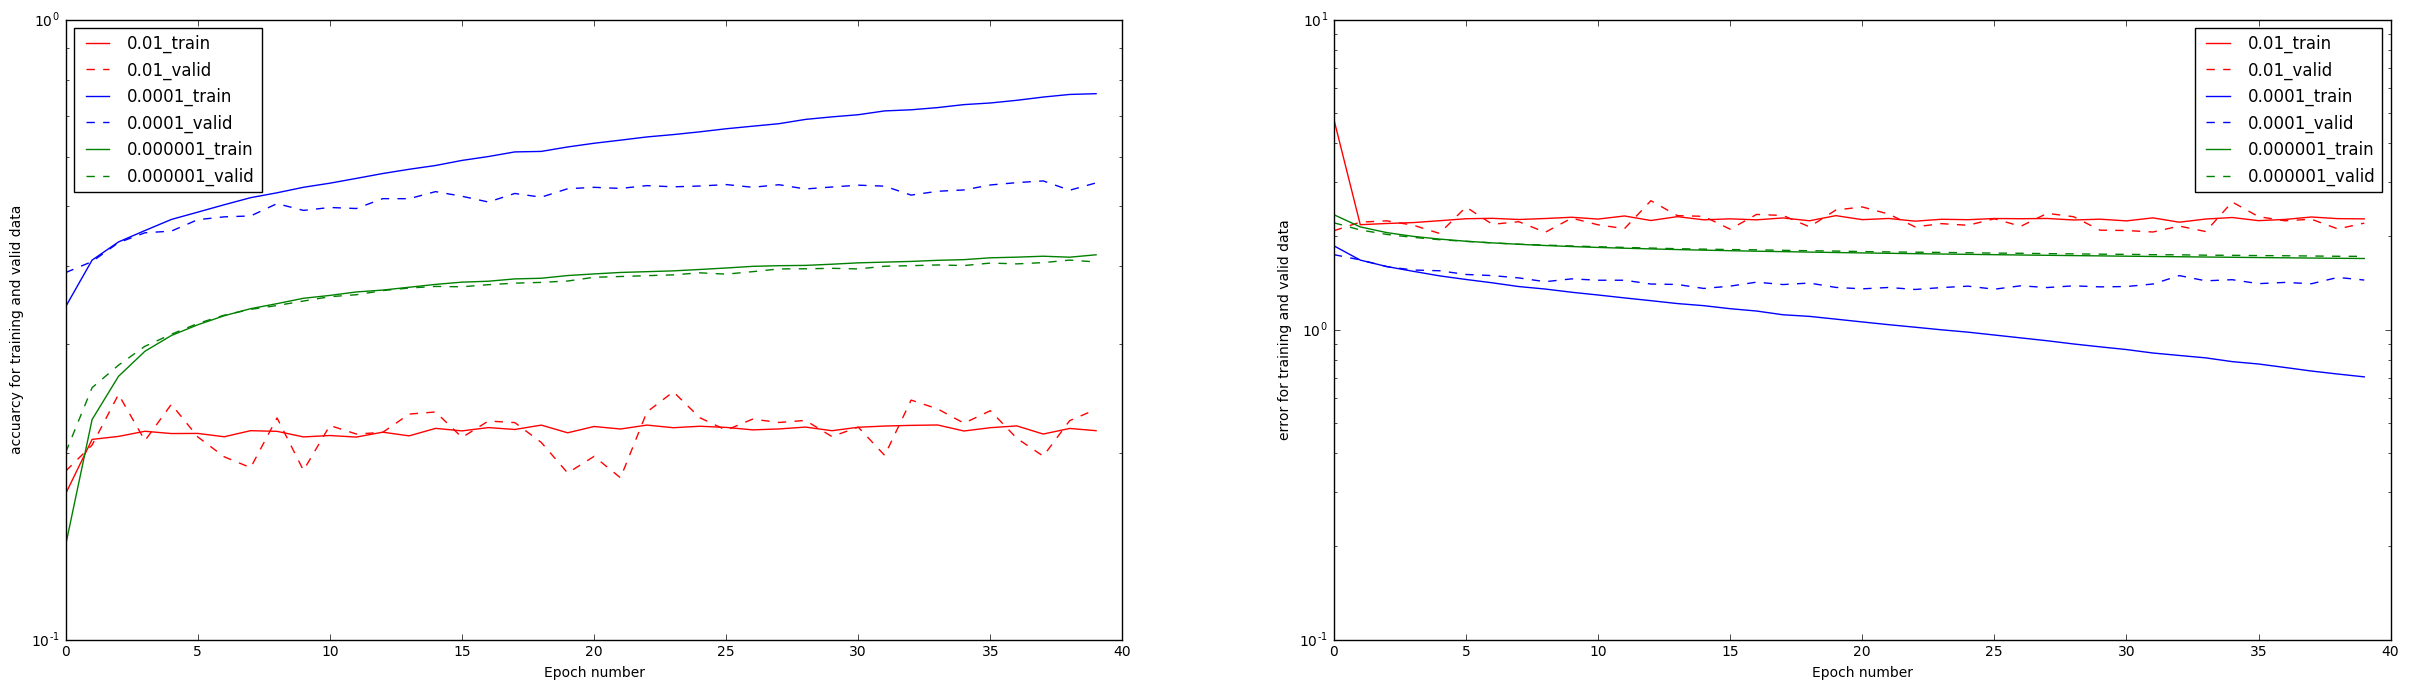

In [25]:
fig = plt.figure(figsize=(30, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(listacc_train_6,label="0.01_train",color='red')
ax1.plot(listacc_valid_6,label="0.01_valid",linestyle='--',color='red')
ax2.plot(listerr_train_6,label="0.01_train",color='red')
ax2.plot(listerr_valid_6,label="0.01_valid",linestyle='--',color='red')
ax1.plot(listacc_train_7,label="0.0001_train",color='blue')
ax1.plot(listacc_valid_7,label="0.0001_valid",linestyle='--',color='blue')
ax2.plot(listerr_train_7,label="0.0001_train",color='blue')
ax2.plot(listerr_valid_7,label="0.0001_valid", linestyle='--',color='blue')
ax1.plot(listacc_train_8,label="0.000001_train",color='green')
ax1.plot(listacc_valid_8,label="0.000001_valid", linestyle='--',color='green')
ax2.plot(listerr_train_8,label="0.000001_train",color='green')
ax2.plot(listerr_valid_8,label="0.000001_valid", linestyle='--',color='green')

# ax1.plot(listacc_train_5,label="tanh_train",color='yellow')
# ax1.plot(listacc_valid_5,label="tanh_valid", linestyle='--',color='yellow')
# ax2.plot(listerr_train_5,label="tanh_train",color='yellow')
# ax2.plot(listerr_valid_5,label="tanh_valid", linestyle='--',color='yellow')
ax1.legend(loc=0)
ax1.set_xlabel('Epoch number')
ax1.set_ylabel("accuarcy for training and valid data")
ax1.set_yscale('log')
ax2.legend(loc=0)
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('error for training and valid data')
ax2.set_yscale('log')
fig.savefig("dlr.pdf")

In [46]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    hidden_1=tf.nn.dropout(hidden_1,0.5)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    hidden_2= tf.nn.dropout(hidden_2,0.5)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    
with tf.name_scope('error'):
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(0.0001).minimize(error)
    
init = tf.global_variables_initializer()

listacc_train_3=[]
listerr_train_3=[]
listacc_valid_3=[]
listerr_valid_3=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(40):
        running_error = 0.
        running_accuracy = 0.
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        listerr_train_3.append(running_error)
        listacc_train_3.append(running_accuracy)
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        listerr_valid_3.append(valid_error)
        listacc_valid_3.append(valid_accuracy)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=2.45 acc(train)=0.23
                 err(valid)=2.24 acc(valid)=0.26
End of epoch 02: err(train)=2.18 acc(train)=0.27
                 err(valid)=2.13 acc(valid)=0.29
End of epoch 03: err(train)=2.09 acc(train)=0.29
                 err(valid)=2.07 acc(valid)=0.29
End of epoch 04: err(train)=2.02 acc(train)=0.31
                 err(valid)=2.02 acc(valid)=0.30
End of epoch 05: err(train)=1.98 acc(train)=0.32
                 err(valid)=1.99 acc(valid)=0.31
End of epoch 06: err(train)=1.93 acc(train)=0.33
                 err(valid)=1.98 acc(valid)=0.32
End of epoch 07: err(train)=1.89 acc(train)=0.34
                 err(valid)=1.92 acc(valid)=0.34
End of epoch 08: err(train)=1.86 acc(train)=0.35
                 err(valid)=1.89 acc(valid)=0.33
End of epoch 09: err(train)=1.83 acc(train)=0.35
                 err(valid)=1.87 acc(valid)=0.34
End of epoch 10: err(train)=1.80 acc(train)=0.36
                 err(valid)=1.82 acc(valid)=0.36
End of epoch 11: err

In [47]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    hidden_1=tf.nn.dropout(hidden_1,0.9)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    hidden_2= tf.nn.dropout(hidden_2,0.9)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    
with tf.name_scope('error'):
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(0.0001).minimize(error)
    
init = tf.global_variables_initializer()

listacc_train_2=[]
listerr_train_2=[]
listacc_valid_2=[]
listerr_valid_2=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(40):
        running_error = 0.
        running_accuracy = 0.
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        listerr_train_2.append(running_error)
        listacc_train_2.append(running_accuracy)
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        listerr_valid_2.append(valid_error)
        listacc_valid_2.append(valid_accuracy)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=1.94 acc(train)=0.31
                 err(valid)=1.80 acc(valid)=0.36
End of epoch 02: err(train)=1.76 acc(train)=0.38
                 err(valid)=1.69 acc(valid)=0.40
End of epoch 03: err(train)=1.68 acc(train)=0.40
                 err(valid)=1.67 acc(valid)=0.41
End of epoch 04: err(train)=1.63 acc(train)=0.42
                 err(valid)=1.63 acc(valid)=0.43
End of epoch 05: err(train)=1.59 acc(train)=0.44
                 err(valid)=1.61 acc(valid)=0.44
End of epoch 06: err(train)=1.56 acc(train)=0.45
                 err(valid)=1.58 acc(valid)=0.44
End of epoch 07: err(train)=1.52 acc(train)=0.46
                 err(valid)=1.58 acc(valid)=0.44
End of epoch 08: err(train)=1.49 acc(train)=0.47
                 err(valid)=1.56 acc(valid)=0.45
End of epoch 09: err(train)=1.47 acc(train)=0.48
                 err(valid)=1.52 acc(valid)=0.46
End of epoch 10: err(train)=1.44 acc(train)=0.49
                 err(valid)=1.52 acc(valid)=0.47
End of epoch 11: err

In [48]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    hidden_1=tf.nn.dropout(hidden_1,0.1)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    hidden_2= tf.nn.dropout(hidden_2,0.1)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    
with tf.name_scope('error'):
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(0.0001).minimize(error)
    
init = tf.global_variables_initializer()

listacc_train_1=[]
listerr_train_1=[]
listacc_valid_1=[]
listerr_valid_1=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(40):
        running_error = 0.
        running_accuracy = 0.
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        listerr_train_1.append(running_error)
        listacc_train_1.append(running_accuracy)
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        listerr_valid_1.append(valid_error)
        listacc_valid_1.append(valid_accuracy)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=8.59 acc(train)=0.12
                 err(valid)=6.96 acc(valid)=0.12
End of epoch 02: err(train)=6.45 acc(train)=0.13
                 err(valid)=5.76 acc(valid)=0.13
End of epoch 03: err(train)=5.28 acc(train)=0.14
                 err(valid)=4.81 acc(valid)=0.15
End of epoch 04: err(train)=4.40 acc(train)=0.15
                 err(valid)=4.03 acc(valid)=0.15
End of epoch 05: err(train)=3.73 acc(train)=0.16
                 err(valid)=3.39 acc(valid)=0.16
End of epoch 06: err(train)=3.21 acc(train)=0.16
                 err(valid)=3.01 acc(valid)=0.16
End of epoch 07: err(train)=2.80 acc(train)=0.18
                 err(valid)=2.66 acc(valid)=0.17
End of epoch 08: err(train)=2.52 acc(train)=0.18
                 err(valid)=2.41 acc(valid)=0.19
End of epoch 09: err(train)=2.32 acc(train)=0.19
                 err(valid)=2.27 acc(valid)=0.20
End of epoch 10: err(train)=2.19 acc(train)=0.21
                 err(valid)=2.17 acc(valid)=0.21
End of epoch 11: err

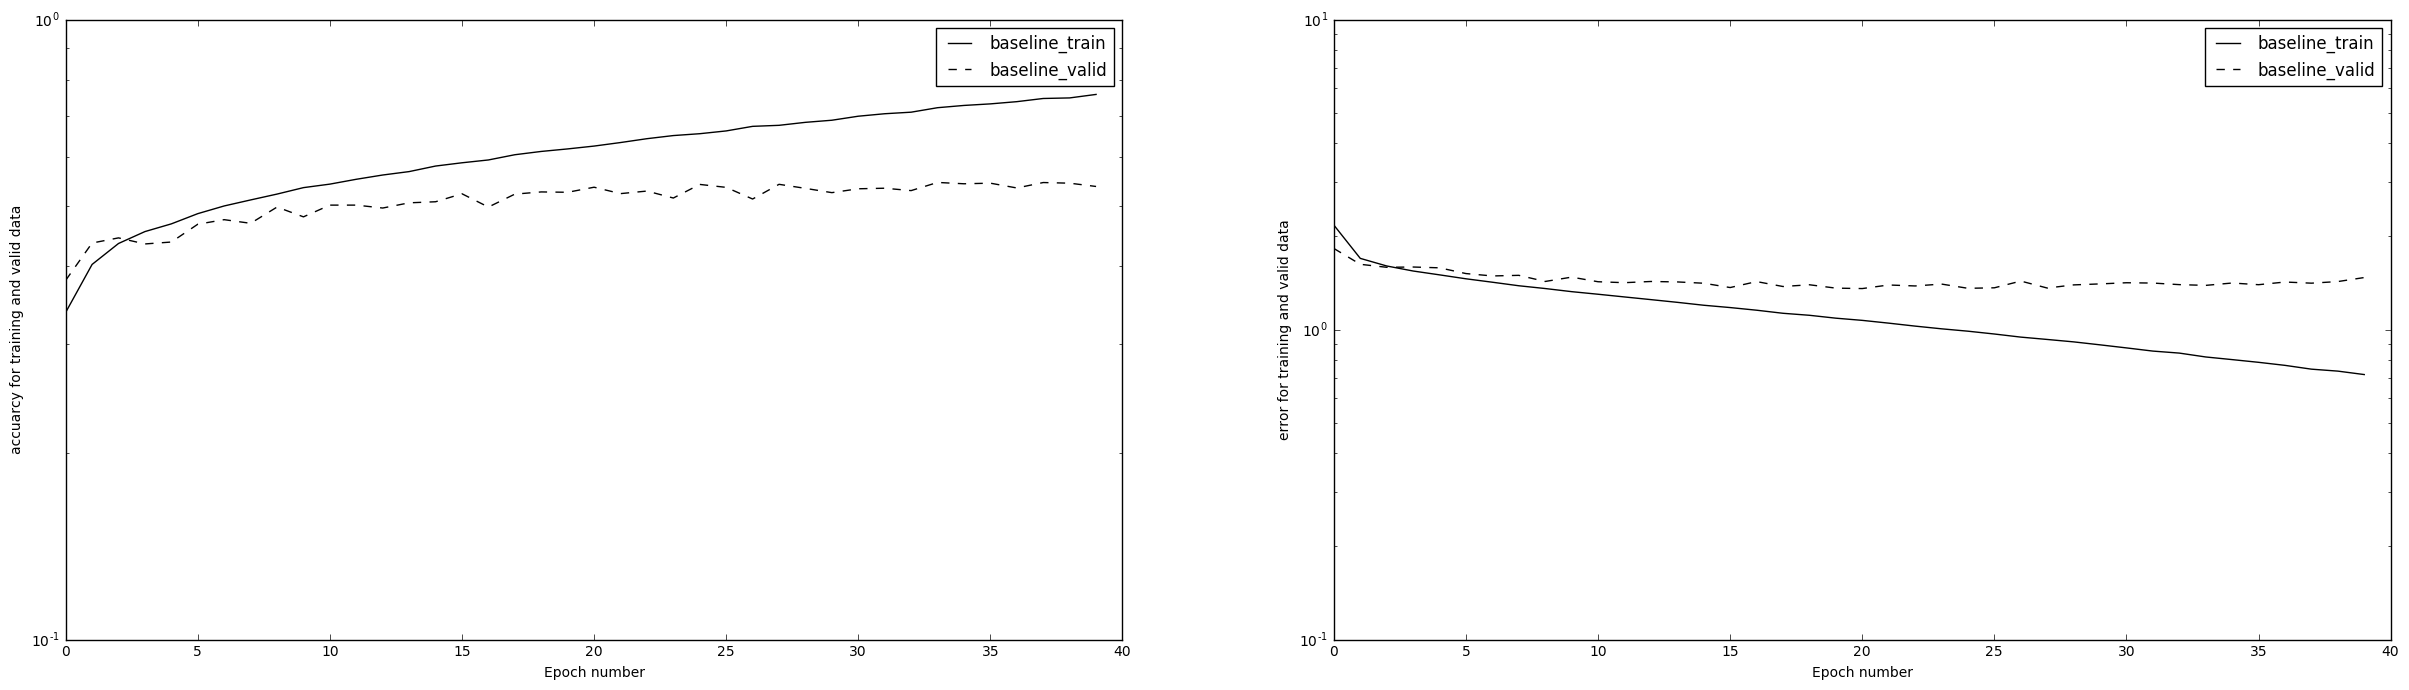

In [56]:
fig = plt.figure(figsize=(30, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


ax1.plot(listacc_train_5,label="baseline_train",color='black')
ax1.plot(listacc_valid_5,label="baseline_valid", linestyle='--',color='black')
ax2.plot(listerr_train_5,label="baseline_train",color='black')
ax2.plot(listerr_valid_5,label="baseline_valid", linestyle='--',color='black')
ax1.legend(loc=0)
ax1.set_xlabel('Epoch number')
ax1.set_ylabel("accuarcy for training and valid data")
ax1.set_yscale('log')
ax2.legend(loc=0)
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('error for training and valid data')
ax2.set_yscale('log')
fig.savefig("final.pdf")

In [55]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 500

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    hidden_1=tf.nn.dropout(hidden_1,0.9)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    hidden_2= tf.nn.dropout(hidden_2,0.9)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    
with tf.name_scope('error'):
    error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(0.0005).minimize(error)
    
init = tf.global_variables_initializer()

listacc_train_9=[]
listerr_train_9=[]
listacc_valid_9=[]
listerr_valid_9=[]

with tf.Session() as sess:
    sess.run(init)
    for e in range(40):
        running_error = 0.
        running_accuracy = 0.
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches
        listerr_train_9.append(running_error)
        listacc_train_9.append(running_accuracy)
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        listerr_valid_9.append(valid_error)
        listacc_valid_9.append(valid_accuracy)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=2.07 acc(train)=0.29
                 err(valid)=1.88 acc(valid)=0.33
End of epoch 02: err(train)=1.80 acc(train)=0.36
                 err(valid)=1.78 acc(valid)=0.37
End of epoch 03: err(train)=1.71 acc(train)=0.39
                 err(valid)=1.68 acc(valid)=0.41
End of epoch 04: err(train)=1.64 acc(train)=0.41
                 err(valid)=1.70 acc(valid)=0.41
End of epoch 05: err(train)=1.57 acc(train)=0.44
                 err(valid)=1.56 acc(valid)=0.45
End of epoch 06: err(train)=1.53 acc(train)=0.45
                 err(valid)=1.57 acc(valid)=0.45
End of epoch 07: err(train)=1.49 acc(train)=0.47
                 err(valid)=1.55 acc(valid)=0.45
End of epoch 08: err(train)=1.45 acc(train)=0.48
                 err(valid)=1.54 acc(valid)=0.45
End of epoch 09: err(train)=1.42 acc(train)=0.49
                 err(valid)=1.50 acc(valid)=0.47
End of epoch 10: err(train)=1.39 acc(train)=0.50
                 err(valid)=1.50 acc(valid)=0.48
End of epoch 11: err